In [1]:
import glob
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
from natsort import natsorted

base_file = '/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default**.ome.tif'
out_file = '/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/out/'
os.makedirs(out_file, exist_ok=True)
imgs = list(natsorted(glob.glob(base_file)))
for i in imgs:
    print(i)

/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default.ome.tif
/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default_1.ome.tif
/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default_2.ome.tif
/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default_3.ome.tif
/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default_4.ome.tif
/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default_5.ome.tif
/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default_6.ome.tif
/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default_7.ome.tif
/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default_8.ome.tif
/ho

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
import os

os.makedirs(out_file, exist_ok=True)


bbox = 128

y = 285
x = 370
min_x = x - (bbox//2)
max_x = x + (bbox//2)
min_y = y - (bbox//2)
max_y = y + (bbox//2)

print(max_x, max_y)


sub_imgs = []
i = 0
for impath in tqdm(imgs):
    with Image.open(impath) as im:
        sub_img = np.zeros((im.n_frames, max_y-min_y, max_x-min_x))
        for frame in range(im.n_frames):
            im.seek(frame)
            sub_img[frame] = im.crop((min_x, min_y, max_x, max_y))

    
#     imwrite(outfile, sub_img)
    print(sub_img.shape)
    sub_imgs.append(sub_img)

roi = np.concatenate(sub_imgs, axis=0)
outfile = out_file + f'out.ome.tif'
imwrite(outfile, roi, compress=6)


  0%|                                                                                                                                                                 | 0/22 [00:00<?, ?it/s]

434 349


  5%|██████▉                                                                                                                                                  | 1/22 [00:21<07:28, 21.37s/it]

(3647, 128, 128)


  9%|█████████████▉                                                                                                                                           | 2/22 [00:28<05:44, 17.24s/it]

(3647, 128, 128)


 14%|████████████████████▊                                                                                                                                    | 3/22 [00:38<04:46, 15.07s/it]

(3647, 128, 128)


 18%|███████████████████████████▊                                                                                                                             | 4/22 [00:48<04:01, 13.44s/it]

(3647, 128, 128)


 23%|██████████████████████████████████▊                                                                                                                      | 5/22 [00:58<03:28, 12.29s/it]

(3647, 128, 128)


 27%|█████████████████████████████████████████▋                                                                                                               | 6/22 [01:06<02:58, 11.17s/it]

(3647, 128, 128)


 32%|████████████████████████████████████████████████▋                                                                                                        | 7/22 [01:16<02:40, 10.73s/it]

(3647, 128, 128)


 36%|███████████████████████████████████████████████████████▋                                                                                                 | 8/22 [01:25<02:22, 10.15s/it]

(3647, 128, 128)


 41%|██████████████████████████████████████████████████████████████▌                                                                                          | 9/22 [01:33<02:06,  9.72s/it]

(3647, 128, 128)


 45%|█████████████████████████████████████████████████████████████████████                                                                                   | 10/22 [01:43<01:56,  9.67s/it]

(3647, 128, 128)


 50%|████████████████████████████████████████████████████████████████████████████                                                                            | 11/22 [01:52<01:44,  9.46s/it]

(3647, 128, 128)


 55%|██████████████████████████████████████████████████████████████████████████████████▉                                                                     | 12/22 [02:01<01:32,  9.27s/it]

(3647, 128, 128)


 59%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 13/22 [02:11<01:24,  9.43s/it]

(3647, 128, 128)


 64%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 14/22 [02:21<01:17,  9.72s/it]

(3647, 128, 128)


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 15/22 [02:30<01:07,  9.57s/it]

(3647, 128, 128)


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 16/22 [02:39<00:56,  9.41s/it]

(3647, 128, 128)


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 17/22 [02:49<00:46,  9.39s/it]

(3647, 128, 128)


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 18/22 [02:58<00:37,  9.42s/it]

(3647, 128, 128)


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 19/22 [03:08<00:28,  9.46s/it]

(3647, 128, 128)


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 20/22 [03:17<00:19,  9.53s/it]

(3647, 128, 128)


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 21/22 [03:26<00:09,  9.18s/it]

(3647, 128, 128)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [03:33<00:00,  9.71s/it]

(3413, 128, 128)


In [5]:
roi = roi.astype(np.uint16)
# roi = roi / roi.max()
print(roi.dtype)
outfile = out_file + f'out16.ome.tif'
imwrite(outfile, roi)


uint16


In [35]:
picasso_path = '/home/miguel/Projects/uni/phd/smlm_z/picasso/venv/bin/picasso'
gradient = 25000
bbox = 7
res = 115
sensitivity = 0.45
quantum_ef = 0.9

em_gain = 1
baseline = 100

! {picasso_path} localize -qe {quantum_ef} -bl {baseline} -s {sensitivity} -a lq -b {bbox} -g {gradient} -px {res} {outfile}



    ____  _____________   __________ ____ 
   / __ \/  _/ ____/   | / ___/ ___// __ \
  / /_/ // // /   / /| | \__ \\__ \/ / / /
 / _____/ // /___/ ___ |___/ ___/ / /_/ / 
/_/   /___/\____/_/  |_/____/____/\____/  
                                          
Localize - Parameters:
No       Label           Value     
1        command         localize  
2        files           /home/miguel/Projects/uni/data/smlm_3d/20230215_nup_motic_largeFOV/60msMotic/storm_1/out/out.ome.tif
3        box_side_length 7         
4        fit_method      lq        
5        gradient        25000     
6        drift           1000      
7        roi             None
8        baseline        100       
9        sensitivity     0.45      
10       gain            1         
11       qe              0.9       
12       mf              0         
13       pixelsize       115       
14       zc                        
15       suffix                    
16       database        0         
-----------------------

(9117, 11)


<AxesSubplot:xlabel='x', ylabel='y'>

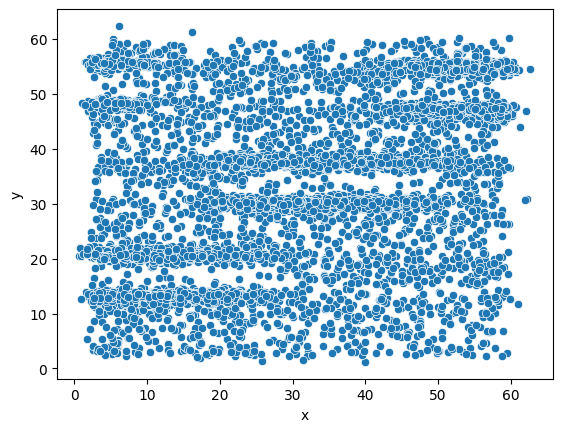

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_hdf(out_file+'out.ome_locs.hdf5', 'locs')
df = df[df['net_gradient']>1.8e20]
print(df.shape)
sns.scatterplot(data=df, x='x', y='y')